In [206]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 


In [207]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [208]:
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [210]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [211]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [212]:
data["MonthlyCharges"]

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [213]:
count= (data["Churn"]=="Yes").sum()
print(count)

    


1869


In [214]:
data["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Data Cleaning 


In [215]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [216]:
data=data.drop(columns="customerID")

In [217]:
#finding unique values
for col in data.columns:
    print(col, data[col].unique())
    print("\n")

gender ['Female' 'Male']


SeniorCitizen [0 1]


Partner ['Yes' 'No']


Dependents ['No' 'Yes']


tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


PhoneService ['No' 'Yes']


MultipleLines ['No phone service' 'No' 'Yes']


InternetService ['DSL' 'Fiber optic' 'No']


OnlineSecurity ['No' 'Yes' 'No internet service']


OnlineBackup ['Yes' 'No' 'No internet service']


DeviceProtection ['No' 'Yes' 'No internet service']


TechSupport ['No' 'Yes' 'No internet service']


StreamingTV ['No' 'Yes' 'No internet service']


StreamingMovies ['No' 'Yes' 'No internet service']


Contract ['Month-to-month' 'One year' 'Two year']


PaperlessBilling ['Yes' 'No']


PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  

In [218]:
# Total chargers are in string formate and it's null values are denoted by " ".
data[data["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [219]:
data["TotalCharges"]=data["TotalCharges"].replace({" ":"0.0"})

In [220]:
 #changing the data type from string to Float 
data["TotalCharges"]=data["TotalCharges"].astype(float)

In [221]:
data["TotalCharges"].dtype

dtype('float64')

EDA


In [222]:
def histogram_plot( data, column):
    plt.figure(figsize=(8,4))
    sns.histplot( data[column],kde= True)
    plt.title(f" Distrubation of {column}")

    col_mean= data[column].mean()
    col_median= data[column].median()

    plt.axvline(col_mean,color="red",linestyle="--",label="Mean")
    plt.axvline(col_median,linestyle="-",color="yellow",label="Median")

    plt.show()
    plt.legend
    

In [223]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

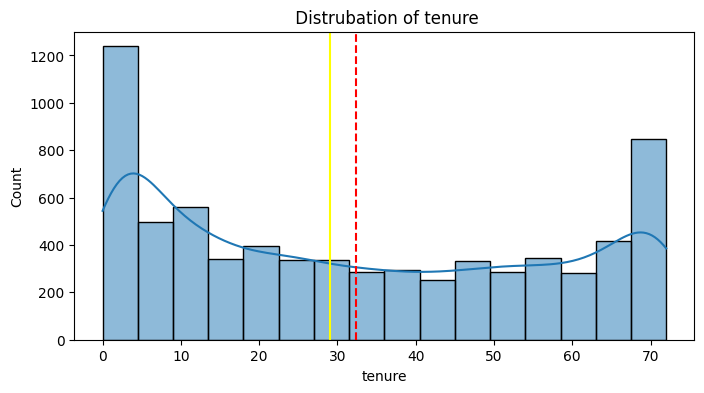

In [224]:
histogram_plot(data,"tenure")

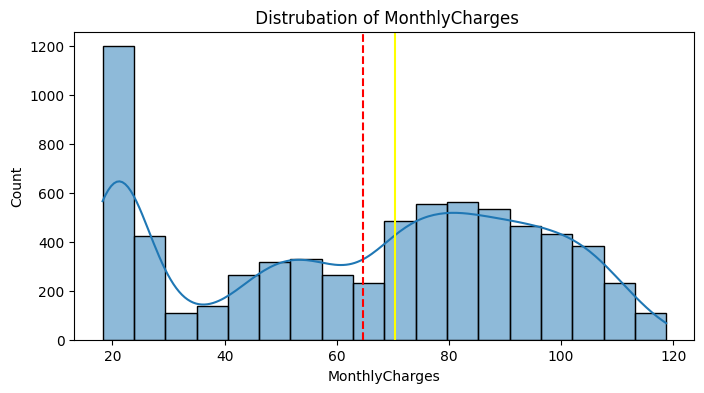

In [225]:
histogram_plot(data,"MonthlyCharges")

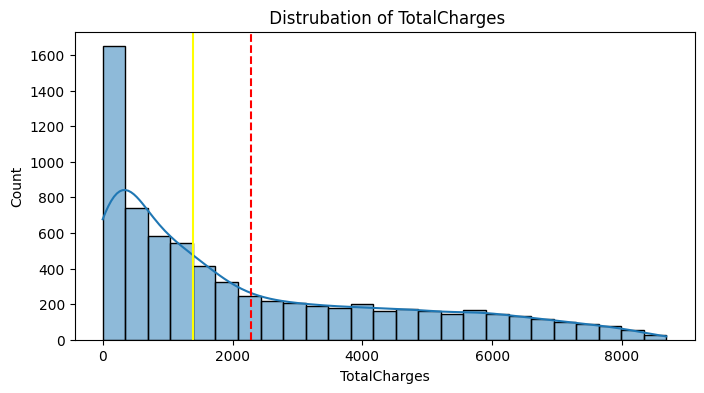

In [226]:
histogram_plot(data,"TotalCharges")

In [227]:
#visuvalizing outliers
def box_plot(data, column):
    plt.figure(figsize=(5,3))
    sns.boxplot(data[column])
    plt.title(f"Outliers of {column}")
    plt.show()
    plt.legend
    
    

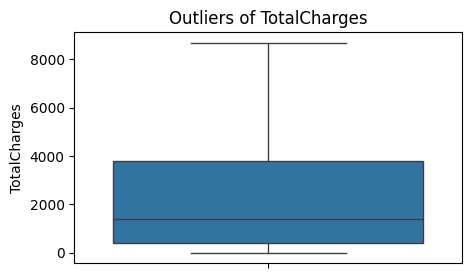

In [228]:
box_plot(data,"TotalCharges")

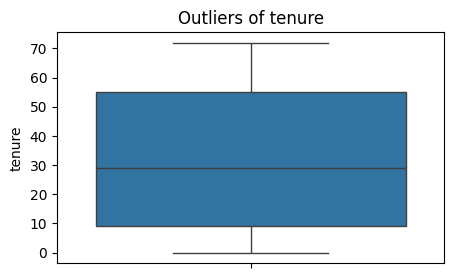

In [229]:
box_plot(data,"tenure")

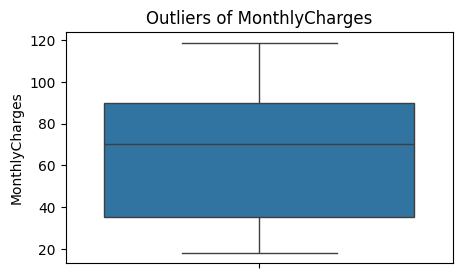

In [230]:
box_plot(data,"MonthlyCharges")

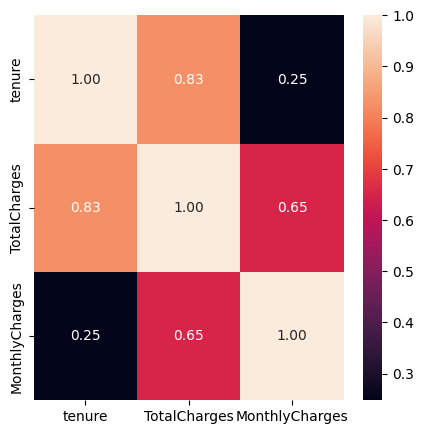

In [231]:
#finding coorelation heatmap
plt.figure(figsize=(5,5))
sns.heatmap(data[["tenure","TotalCharges","MonthlyCharges"]].corr(),annot=True,fmt=".2f")
plt.show()

Data Preprocessing 


In [232]:
#importing libaries requried for preprocessing and model trainimg
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import pickle

In [233]:
# replacing churn= yes with 1 and no with 0
data["Churn"]=data["Churn"].replace({"Yes" :1,"No" : 0})

C:\Users\nagar\AppData\Local\Temp\ipykernel_8228\1349373753.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Churn"]=data["Churn"].replace({"Yes" :1,"No" : 0})


In [234]:
data["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [235]:
object_columns= data.select_dtypes(include="object").columns.to_list()
object_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [236]:
encoder={}
# encoding all the text parameters in to numerical data withe the hapl of label encoder 
for col in object_columns:
    label_encoder=LabelEncoder()
    data[col]=label_encoder.fit_transform(data[col])
    encoder[col]= label_encoder
 
#saving the model as pickle file 
with open("encoder.pkl","wb") as f:
    pickle.dump(encoder,f)

In [237]:
encoder


{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [238]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Splitting the inputs 


In [239]:
X = data.drop(columns = ['Churn'])
y = data['Churn'].values

In [240]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [241]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

Random Forest Classifier

In [249]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [250]:
pd.Series(y_test).value_counts()

0    1552
1     561
Name: count, dtype: int64

In [251]:
#saving the model in pickle file
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("Model saved as 'rf_model.pkl'")

Model saved as 'rf_model.pkl'


In [252]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Detailed Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7841930903928065
Confusion Matrix:
 [[1361  191]
 [ 265  296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1552
           1       0.61      0.53      0.56       561

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.78      0.78      0.78      2113



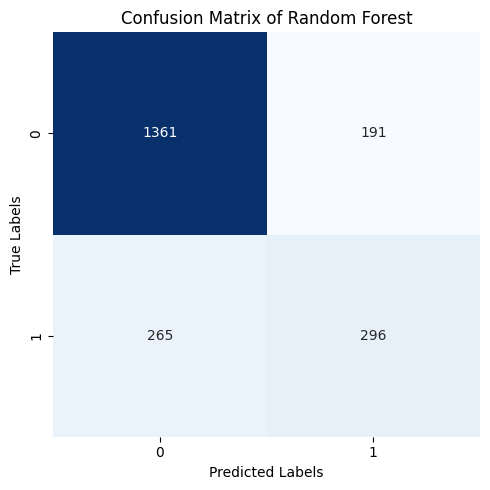

In [253]:
#ploting the confusion matrics 
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

Decision Tree Classifier

In [254]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7302413629910081

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      1552
           1       0.49      0.56      0.53       561

    accuracy                           0.73      2113
   macro avg       0.66      0.68      0.67      2113
weighted avg       0.74      0.73      0.74      2113



In [255]:
with open("dt_model.pkl", "wb") as file:
    pickle.dump(dt_model, file)

print("Model saved as 'dt_model.pkl'")

Model saved as 'dt_model.pkl'


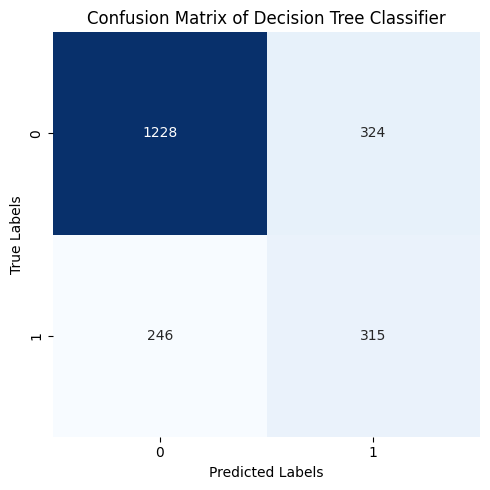

In [256]:
#ploting the confusion matrics 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

XGBoost classifier

In [257]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

C:\Users\nagar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:30:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [258]:
with open("xgb_model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

print("Model saved as 'xgb_model.pkl'")

Model saved as 'xgb_model.pkl'


In [259]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7856128726928537

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1552
           1       0.60      0.57      0.59       561

    accuracy                           0.79      2113
   macro avg       0.72      0.72      0.72      2113
weighted avg       0.78      0.79      0.78      2113



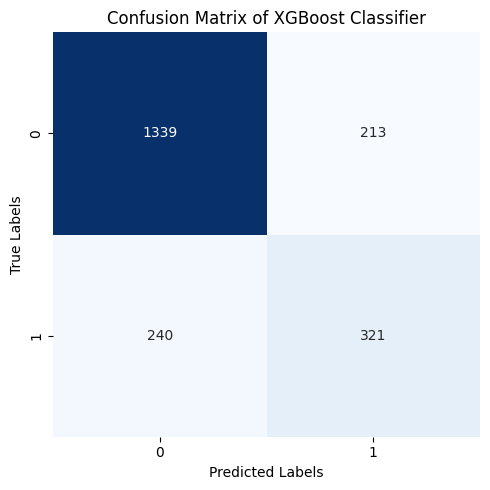

In [260]:
#ploting the confusion matrics 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of XGBoost Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

Predicting New Value 

In [268]:
object_columns 


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [309]:
input_data = {
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 5,
    'PhoneService': 'Yes',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 149.25,
}





In [310]:
input_data_df =pd.DataFrame([input_data])


In [311]:
input_data_df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,No,5,Yes,No phone service,DSL,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,29.85,149.25


In [312]:
with open("encoder.pkl","rb") as f:
    encoder=pickle.load(f)

#encoding the values with the help of saved encoder
for col, encoder in encoder.items():
    input_data_df[col]=encoder.transform(input_data_df[col].astype(str))

In [313]:
input_data_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,5,1,1,0,0,2,0,0,0,2,0,1,2,29.85,149.25


In [314]:
#loading rf_model,dt_model and xgb_model for prediction
with open("dt_model.pkl", "rb") as file:
    loaded_dt = pickle.load(file)

In [315]:
with open("rf_model.pkl", "rb") as file:
    loaded_rf = pickle.load(file)

In [316]:
with open("xgb_model.pkl", "rb") as file:
    loaded_xgb = pickle.load(file)

In [317]:
rf_prediction=loaded_xgb.predict(input_data_df)
rf_prob=loaded_xgb.predict_proba(input_data_df)


In [318]:
print(rf_prediction)

[1]


In [319]:
print(rf_prob)

[[0.21182728 0.7881727 ]]
